In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data extraction

In [2]:
import os

# Print current working directory
print("Current working directory:", os.getcwd())

# Change directory to C:\Users\user\Downloads
os.chdir(r'C:\Users\user\Downloads')

# Print new working directory
print("New working directory:", os.getcwd())

# Read CSV file
df = pd.read_csv('dataset_for_datascience_assignment (1).csv')

# Print DataFrame
print(df.head())

Current working directory: C:\Users\user
New working directory: C:\Users\user\Downloads
         REGISTRATION_DATE REGISTRATION_COUNTRY  PURCHASE_COUNT  \
0  2019-09-01 00:00:00.000                  DNK               0   
1  2019-09-01 00:00:00.000                  FIN               1   
2  2019-09-01 00:00:00.000                  DNK              19   
3  2019-09-01 00:00:00.000                  FIN               0   
4  2019-09-01 00:00:00.000                  GRC               0   

   PURCHASE_COUNT_DELIVERY  PURCHASE_COUNT_TAKEAWAY       FIRST_PURCHASE_DAY  \
0                      NaN                      NaN                      NaN   
1                      1.0                      0.0  2020-09-02 00:00:00.000   
2                     19.0                      0.0  2019-12-10 00:00:00.000   
3                      NaN                      NaN                      NaN   
4                      NaN                      NaN                      NaN   

         LAST_PURCHASE_DAY  

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

## Data Cleaning

In [4]:
# Handle missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
REGISTRATION_DATE                              0
REGISTRATION_COUNTRY                           0
PURCHASE_COUNT                                 0
PURCHASE_COUNT_DELIVERY                     9955
PURCHASE_COUNT_TAKEAWAY                     9955
FIRST_PURCHASE_DAY                         10019
LAST_PURCHASE_DAY                           9956
USER_ID                                        0
BREAKFAST_PURCHASES                         9955
LUNCH_PURCHASES                             9955
EVENING_PURCHASES                           9955
DINNER_PURCHASES                            9955
LATE_NIGHT_PURCHASES                        9955
TOTAL_PURCHASES_EUR                         9955
DISTINCT_PURCHASE_VENUE_COUNT               9955
MIN_PURCHASE_VALUE_EUR                      9955
MAX_PURCHASE_VALUE_EUR                      9955
AVG_PURCHASE_VALUE_EUR                      9955
PREFERRED_DEVICE                              73
IOS_PURCHASES                        

In [5]:
# Handling missing values
# Fill or drop columns based on missing data count

# Handle other missing values:
df['PREFERRED_DEVICE'] = df['PREFERRED_DEVICE'].fillna('unknown')

# Dropping columns that have excessive missing data and might not be useful for analysis
df.drop(columns=['PREFERRED_RESTAURANT_TYPES'], inplace=True)

In [6]:
#fill the missing values with 0 for purchase related coulmns(that is for inactive 
purchase_cols = [col for col in df.columns if 'PURCHASE' in col and col != 'PURCHASE_COUNT']
df[purchase_cols] = df[purchase_cols].fillna(0)
df.fillna({'AVERAGE_DELIVERY_DISTANCE_KMS': 0}, inplace=True)
print(df.isnull().sum()) #confirm for missing values again

REGISTRATION_DATE                          0
REGISTRATION_COUNTRY                       0
PURCHASE_COUNT                             0
PURCHASE_COUNT_DELIVERY                    0
PURCHASE_COUNT_TAKEAWAY                    0
FIRST_PURCHASE_DAY                         0
LAST_PURCHASE_DAY                          0
USER_ID                                    0
BREAKFAST_PURCHASES                        0
LUNCH_PURCHASES                            0
EVENING_PURCHASES                          0
DINNER_PURCHASES                           0
LATE_NIGHT_PURCHASES                       0
TOTAL_PURCHASES_EUR                        0
DISTINCT_PURCHASE_VENUE_COUNT              0
MIN_PURCHASE_VALUE_EUR                     0
MAX_PURCHASE_VALUE_EUR                     0
AVG_PURCHASE_VALUE_EUR                     0
PREFERRED_DEVICE                           0
IOS_PURCHASES                              0
WEB_PURCHASES                              0
ANDROID_PURCHASES                          0
USER_HAS_V

# Data transformation

In [7]:
# Ensure the date columns are in datetime format
df['FIRST_PURCHASE_DAY'] = pd.to_datetime(df['FIRST_PURCHASE_DAY'])
df['LAST_PURCHASE_DAY'] = pd.to_datetime(df['LAST_PURCHASE_DAY'])

# Calculate retention in days
df['RETENTION'] = (df['LAST_PURCHASE_DAY'] - df['FIRST_PURCHASE_DAY'])

# Display retention statistics
print(df['RETENTION'].describe())


count                          21983
mean     133 days 05:13:06.880771506
std      985 days 01:49:31.492532880
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                133 days 00:00:00
max              18559 days 00:00:00
Name: RETENTION, dtype: object


In [8]:
# Calculate the average purchase value (assuming `TOTAL_PURCHASES_EUR` and `PURCHASE_COUNT` exist)
df['AVG_PURCHASE_VALUE'] = df['TOTAL_PURCHASES_EUR'] / df['PURCHASE_COUNT']
df['AVG_PURCHASE_VALUE'].describe()

count    12028.000000
mean        31.195745
std         20.715314
min          1.012000
25%         19.396667
50%         27.433485
75%         38.456000
max        657.800000
Name: AVG_PURCHASE_VALUE, dtype: float64

In [9]:
# Calculate distinct counts for key categorical features
distinct_counts = {
    'Total Users': df['USER_ID'].nunique(),
    'Countries': df['REGISTRATION_COUNTRY'].nunique(),
    'Device Types': df['PREFERRED_DEVICE'].nunique(),
    'Payment Methods': df['USER_HAS_VALID_PAYMENT_METHOD'].nunique(),
    'Weekdays Purchased': df['MOST_COMMON_WEEKDAY_TO_PURCHASE'].nunique()
}

# Convert to DataFrame for display
counts_df = pd.DataFrame.from_dict(distinct_counts, 
                                 orient='index',
                                 columns=['Distinct Count'])
print(counts_df)

                    Distinct Count
Total Users                  21983
Countries                       59
Device Types                     4
Payment Methods                  2
Weekdays Purchased               8


# Data Visualization

<Axes: title={'center': 'Purchase Distribution by Meal Type'}>

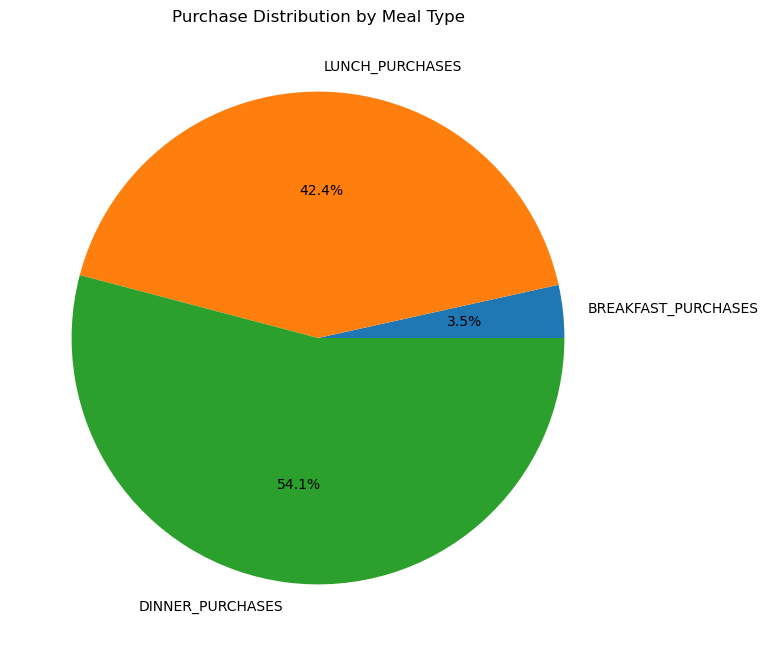

In [10]:
# Meal type breakdown
# List of meal types
meal_types = ['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES']

# Calculate total purchases by meal type
meal_totals = df[meal_types].sum()

# Filter out categories with 0 purchases
meal_totals = meal_totals[meal_totals > 0]

# Plot the pie chart
meal_totals.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title="Purchase Distribution by Meal Type")


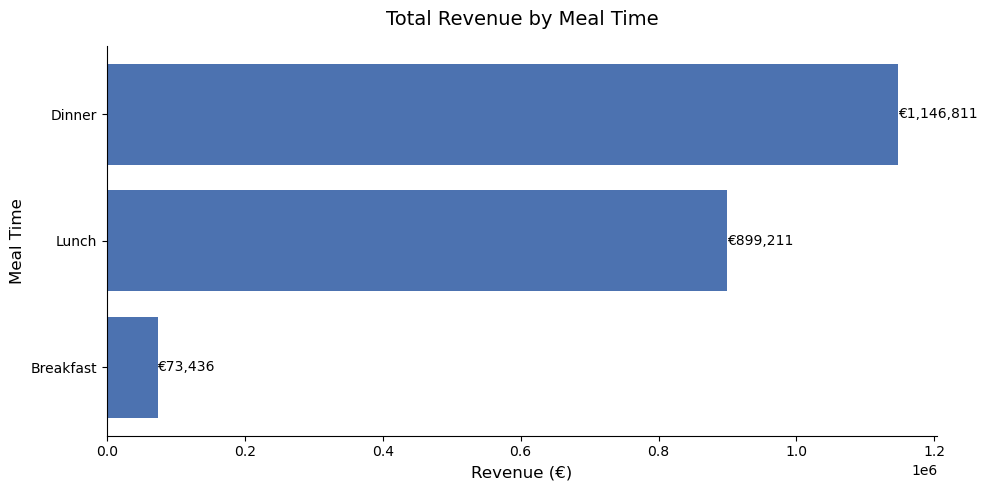


Revenue by Meal Time:
Meal Time Total Revenue (€) Percentage of Total
Breakfast           €73,436                3.5%
    Lunch          €899,211               42.4%
   Dinner        €1,146,811               54.1%


In [11]:
# Define meal time columns
meal_times = ['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES']

# Calculate actual average order value by meal time
aov_by_meal = df[meal_times].sum() / df[meal_times].sum().sum() * df['TOTAL_PURCHASES_EUR'].sum()
aov_by_meal = aov_by_meal[aov_by_meal > 0]  # Remove zero values

# Clean up meal time labels
meal_labels = [x.replace('_PURCHASES', '').title() for x in aov_by_meal.index]

# Create horizontal bar plot
plt.figure(figsize=(10, 5))
bars = plt.barh(meal_labels, aov_by_meal.values, color='#4c72b0')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'€{width:,.0f}',
             va='center')

# Style the plot
plt.title('Total Revenue by Meal Time', pad=15, fontsize=14)
plt.xlabel('Revenue (€)', fontsize=12)
plt.ylabel('Meal Time', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

plt.show()

# Display the data table
print("\nRevenue by Meal Time:")
print(pd.DataFrame({
    'Meal Time': meal_labels,
    'Total Revenue (€)': [f'€{x:,.0f}' for x in aov_by_meal.values],
    'Percentage of Total': [f'{x/aov_by_meal.sum()*100:.1f}%' for x in aov_by_meal.values]
}).to_string(index=False))

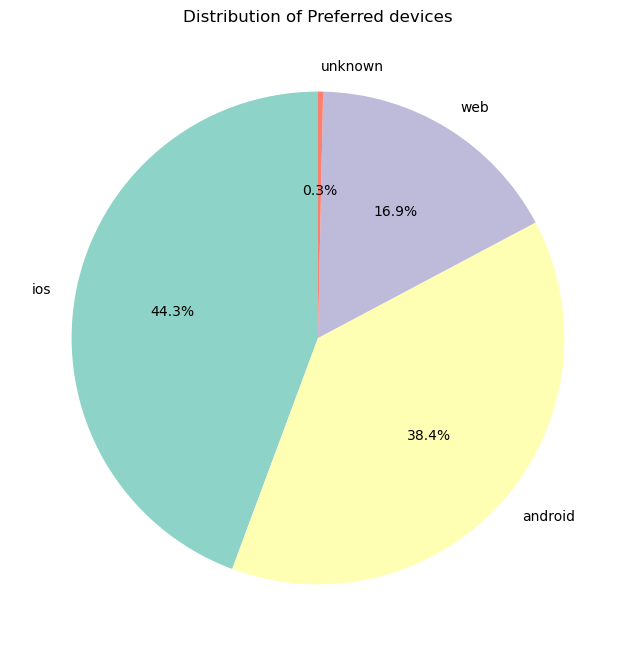

In [12]:
# Calculate device distribution

device_counts = df['PREFERRED_DEVICE'].value_counts()  # Count the occurrences of each country
# Plotting the pie chart
plt.figure(figsize=(8, 8))
device_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(device_counts)))
plt.title("Distribution of Preferred devices")
plt.ylabel('')  
plt.show()


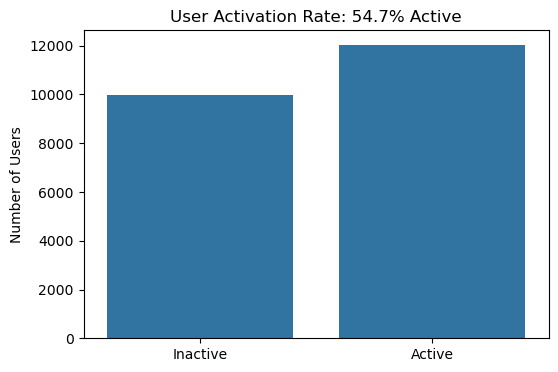

In [13]:
active_users = df[df['PURCHASE_COUNT'] > 0]
activation_rate = len(active_users) / len(df) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=['Inactive', 'Active'], y=[len(df) - len(active_users), len(active_users)])
plt.title(f"User Activation Rate: {activation_rate:.1f}% Active")
plt.ylabel("Number of Users")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9544\4155050732.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=active_counts.values, y=active_counts.index, palette="Blues_d")


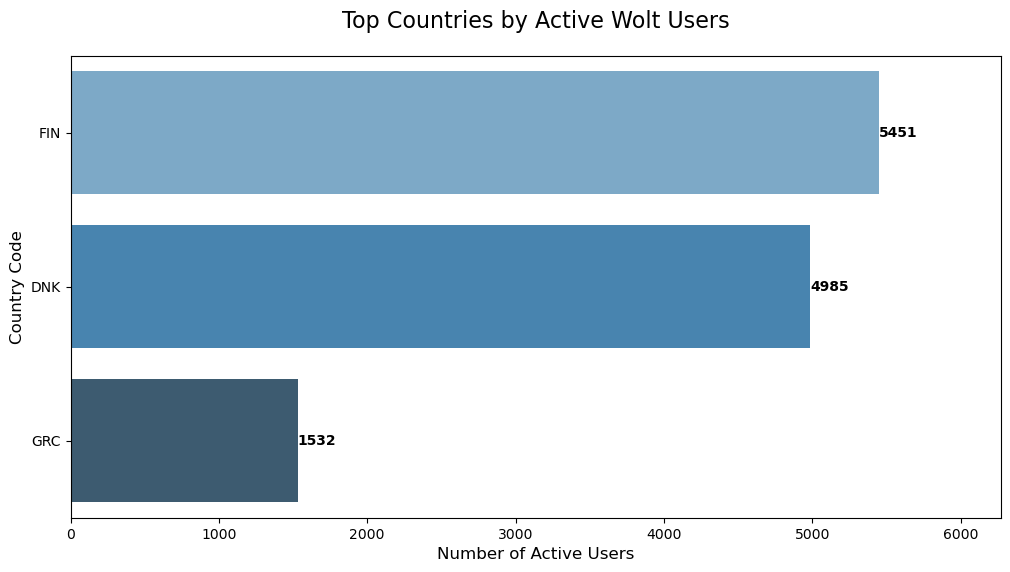

In [14]:
#count active users by country code
active_counts = active_users['REGISTRATION_COUNTRY'].value_counts().head(3)

# Create plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=active_counts.values, y=active_counts.index, palette="Blues_d")

# Add value labels
for i, v in enumerate(active_counts.values):
    ax.text(v + 0.5, i, str(v), color='black', va='center',fontweight='bold')

# Style the plot
plt.title('Top Countries by Active Wolt Users', 
          fontsize=16, pad=20)
plt.xlabel('Number of Active Users', fontsize=12)
plt.ylabel('Country Code', fontsize=12)
plt.xlim(0, active_counts.max() * 1.15)  # Add padding

plt.show()

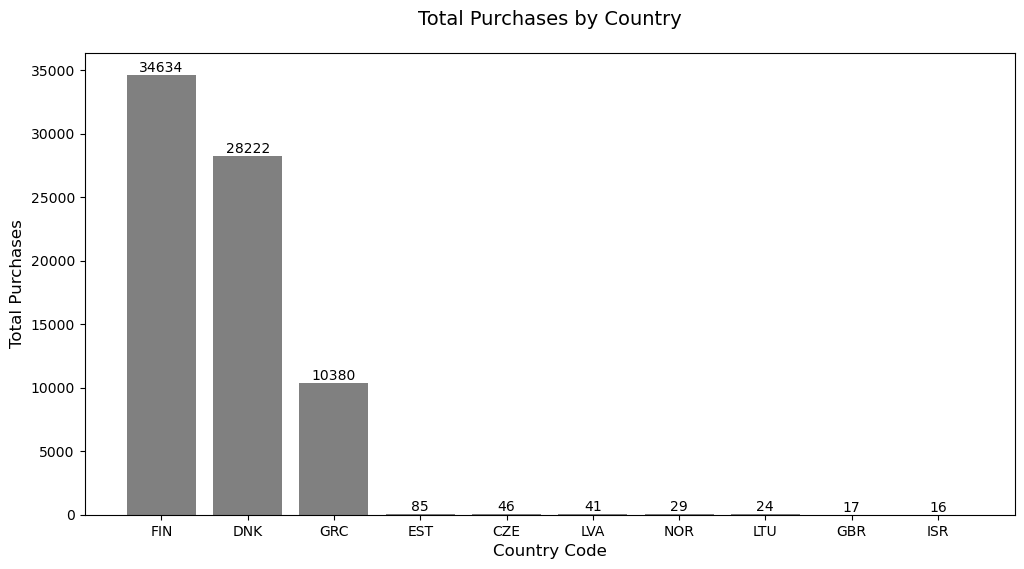

In [15]:

# Calculate TOTAL purchases by country code
total_purchases_by_country = df.groupby('REGISTRATION_COUNTRY')['PURCHASE_COUNT'].sum().sort_values(ascending=False)

# Get top countries
top_countries = total_purchases_by_country.head(10)

# Create simple bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_countries.index, top_countries.values, color='gray')  # Single color

# Add labels and title
plt.title("Total Purchases by Country", fontsize=14, pad=20)
plt.xlabel("Country Code", fontsize=12)
plt.ylabel("Total Purchases", fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')


plt.show()

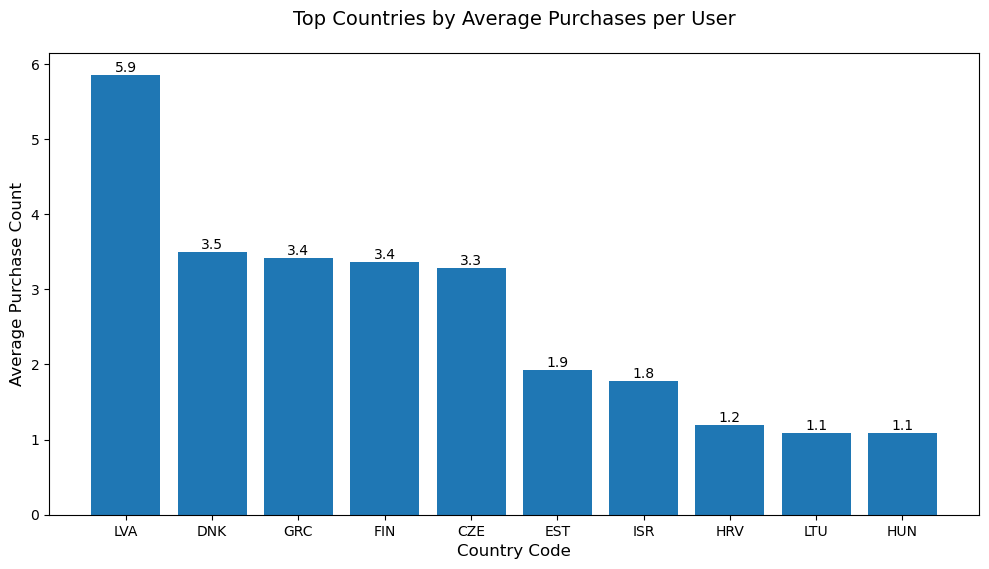

In [16]:
# Calculate average purchase count by country code
purchase_freq_by_country = df.groupby('REGISTRATION_COUNTRY')['PURCHASE_COUNT'].mean().sort_values(ascending=False)

# Get top countries (using country codes directly)
top_countries = purchase_freq_by_country.head(10)

# Visualization with minimal styling
plt.figure(figsize=(12, 6))
plt.bar(x=top_countries.index, height=top_countries.values, color='#1f77b4')  # Simple blue color

plt.title("Top Countries by Average Purchases per User", pad=20, fontsize=14)
plt.ylabel("Average Purchase Count", fontsize=12)
plt.xlabel("Country Code", fontsize=12)
plt.xticks(rotation=0)  # Horizontal country codes

# Add value labels
for i, v in enumerate(top_countries.values):
    plt.text(i, v+0.0, f"{v:.1f}", ha='center', va='bottom')

plt.show()

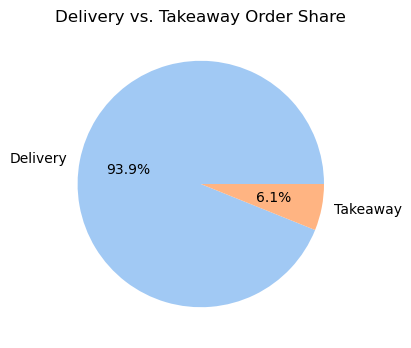

In [17]:
 #Delivery vs. Takeaway Preference
# ---
delivery_ratio = df['PURCHASE_COUNT_DELIVERY'].sum() / (df['PURCHASE_COUNT_DELIVERY'].sum() + df['PURCHASE_COUNT_TAKEAWAY'].sum())

plt.figure(figsize=(6, 4))
plt.pie(
    [delivery_ratio, 1 - delivery_ratio],
    labels=['Delivery', 'Takeaway'],
    autopct='%.1f%%',
    colors=sns.color_palette('pastel')
)
plt.title("Delivery vs. Takeaway Order Share")
plt.show()

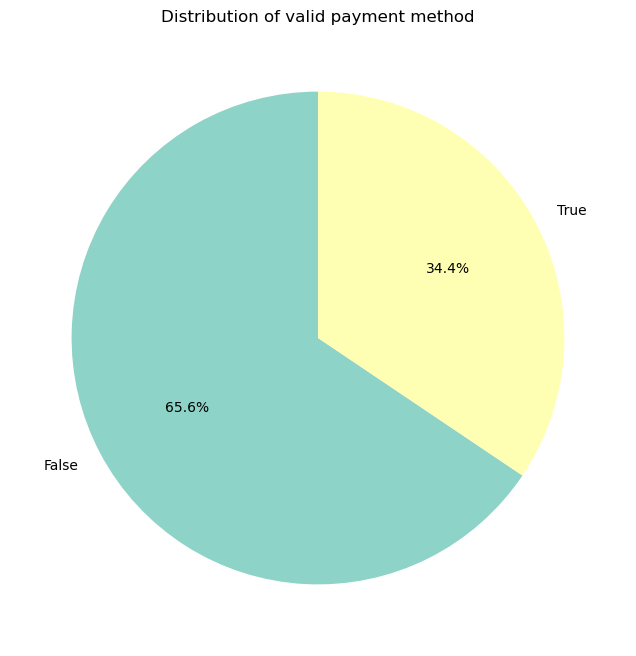

In [18]:
# Calculate device distribution

valid_payment = df['USER_HAS_VALID_PAYMENT_METHOD'].value_counts()  # Count the occurrences of each country
# Plotting the pie chart
plt.figure(figsize=(8, 8))
valid_payment.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(valid_payment)))
plt.title("Distribution of valid payment method")
plt.ylabel('')  
plt.show()


In [19]:
# Clean and preprocess necessary columns again
df['FIRST_PURCHASE_DAY'] = pd.to_datetime(df['FIRST_PURCHASE_DAY'])
df['LAST_PURCHASE_DAY'] = pd.to_datetime(df['LAST_PURCHASE_DAY'])
df['RETENTION_DAYS'] = (df['LAST_PURCHASE_DAY'] - df['FIRST_PURCHASE_DAY'])

# Sort and get top 10 customers by total purchase value
top_customers = df.sort_values(by='TOTAL_PURCHASES_EUR', ascending=False).head(10)
top_customers_info = top_customers[['USER_ID', 'TOTAL_PURCHASES_EUR', 'PURCHASE_COUNT', 'RETENTION_DAYS']]
top_customers_info.reset_index(drop=True, inplace=True)
top_customers_info


,USER_ID,TOTAL_PURCHASES_EUR,PURCHASE_COUNT,RETENTION_DAYS
0,21703,7979.620,14,281 days
1,18673,7080.964,221,348 days
2,17792,4965.884,36,395 days
3,17213,4788.784,74,313 days
4,80,4335.408,320,181 days
5,18772,3584.504,144,391 days
6,9518,3509.616,106,404 days
7,18316,3487.352,111,402 days
8,4073,3461.040,176,125 days
9,2129,3450.920,114,421 days
